In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc,  font_manager
import matplotlib
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import statistics
matplotlib.rcParams['axes.unicode_minus'] = False
fontname = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=fontname).get_name()
rc('font', family=font_name)

In [260]:
# year_df = pd.read_csv('../data/TEMP/경락가격/애호박/애호박 년별 평균가격.csv', index_col=None)
get_data = pd.read_csv('../data/TEMP/경락가격/애호박/애호박 월별 총거래(정제2).csv', index_col=None)

In [261]:
get_data

,Date,서울 총거래물량,서울 총거래금액,서울 평균단가,부산 총거래물량,부산 총거래금액,부산 평균단가,대구 총거래물량,대구 총거래금액,대구 평균단가,대전 총거래물량,대전 총거래금액,대전 평균단가,광주 총거래물량,광주 총거래금액,광주 평균단가
0,2020-01-01,2780377.65,9830108400,3535.529931,314022.5,1158346710,3688.737941,810553.0,2032616500,2507.691045,430426.0,1337955110,3108.443983,478129.0,1644281360,3438.991067
1,2020-02-01,2720669.88,9024401700,3316.977839,331341.0,1143201466,3450.226401,827334.0,1977870900,2390.655890,406261.0,1228049490,3022.809204,451781.0,1441064160,3189.740516
2,2020-03-01,3739541.28,9722242800,2599.849038,435282.4,1220358529,2803.601820,978456.0,1935109400,1977.717342,520843.0,1246237300,2392.731207,587348.0,1509172300,2569.468697
3,2020-04-01,5703989.95,7969557560,1397.189972,607195.5,995696080,1639.827831,1427859.0,1686934100,1181.443056,615618.0,884077957,1436.082046,800667.0,1154068030,1441.383284
4,2020-05-01,5487463.43,7107073600,1295.147328,644394.2,875168986,1358.126727,1371680.0,1533032100,1117.631007,631163.0,818889984,1297.430274,759615.0,938017136,1234.858627
5,2020-06-01,5435012.79,6912510040,1271.847980,556802.2,827896497,1486.877202,1417036.0,1587006500,1119.947905,623977.0,715574424,1146.796154,715343.0,967870900,1353.016525
6,2020-07-01,4369081.64,6969965000,1595.292918,517931.6,935421697,1806.071877,1249719.0,1564919100,1252.216778,554574.0,806098452,1453.545338,545036.0,885620930,1624.885200
7,2020-08-01,3399364.19,10140301900,2982.999565,419775.4,1354083040,3225.732237,1036770.0,2592479800,2500.535124,401571.0,1112157900,2769.517470,456631.2,1386717010,3036.842445
8,2020-09-01,4424172.16,13495784500,3050.465491,425793.8,1461229576,3431.777485,1069058.0,2770102200,2591.161752,463269.0,1232979303,2661.475952,448876.5,1455223520,3241.924048
9,2020-10-01,5212849.56,6208943600,1191.084363,509824.0,787313146,1544.284196,1129309.0,1136481000,1006.350786,485244.0,526468105,1084.955414,549347.0,697140390,1269.034672


In [262]:
get_data['Date'] = pd.to_datetime(get_data['Date'])

In [263]:
years = get_data['Date'].dt.year.unique()

In [264]:

year_mean = []
year_addon = []
for i in years:
    for j in get_data.columns:
        if '평균' in j:
            print(get_data.loc[get_data['Date'].dt.year == i,'%s' %j][:5])
            data_p = get_data.loc[get_data['Date'].dt.year == i,'%s' %j].values
            year_addon.append(data_p.sum())
            # np_std= np.std(get_data.loc[get_data['Date'].dt.year == i,'%s' %j].values)
            # print('표준편차: ',np_std)
            # year_addon.append(np_std)
        elif j != 'Date':
            data_p = get_data.loc[get_data['Date'].dt.year == i,'%s' %j].values
            year_addon.append(data_p.sum())
        else:
            year_addon.append(i)
    year_mean.append(year_addon)
    year_addon = []

year_mean

0    3535.529931
1    3316.977839
2    2599.849038
3    1397.189972
4    1295.147328
Name: 서울 평균단가, dtype: float64
0    3688.737941
1    3450.226401
2    2803.601820
3    1639.827831
4    1358.126727
Name: 부산 평균단가, dtype: float64
0    2507.691045
1    2390.655890
2    1977.717342
3    1181.443056
4    1117.631007
Name: 대구 평균단가, dtype: float64
0    3108.443983
1    3022.809204
2    2392.731207
3    1436.082046
4    1297.430274
Name: 대전 평균단가, dtype: float64
0    3438.991067
1    3189.740516
2    2569.468697
3    1441.383284
4    1234.858627
Name: 광주 평균단가, dtype: float64
12    3796.992564
13    3340.093310
14    2650.735537
15    1615.028450
16    1716.132404
Name: 서울 평균단가, dtype: float64
12    4067.908623
13    3411.699148
14    2998.960255
15    1789.673202
16    1823.043846
Name: 부산 평균단가, dtype: float64
12    2736.902481
13    2429.628947
14    2197.372841
15    1343.183882
16    1362.897116
Name: 대구 평균단가, dtype: float64
12    3745.663733
13    3172.118687
14    2714.001470
15    1695.

[[2020,
  51102052.3,
  101783384400,
  25988.072122596248,
  5660056.1,
  12674733776,
  28730.080370511805,
  13161830.0,
  21677981900,
  20721.621926051484,
  6090057.0,
  11588035170,
  23919.399775180762,
  6830758.7,
  13988202166,
  26100.967508096306],
 [2021,
  46174142.760000005,
  96540979170,
  27237.50759138543,
  5753657.0,
  13221287030,
  30181.800179689486,
  13593558.0,
  23273513218,
  22090.96828743961,
  4506057.0,
  9951150666,
  27385.399831836196,
  6168655.0,
  13356367665,
  27534.954951566524],
 [2022,
  47791699.419999994,
  108330801715,
  28723.82894802732,
  6384089.899999999,
  15242087730,
  30174.079700780665,
  13555823.0,
  24664233900,
  22822.441079591576,
  4866515.0,
  11134510089,
  28820.686019361136,
  7026107.5,
  15231159196,
  28014.850853381242],
 [2023,
  28206576.29,
  68388891702,
  20784.42409442935,
  3980311.4000000004,
  10402027600,
  22297.424840606884,
  7653050.0,
  16120285400,
  17020.948742481232,
  3000827.0,
  7650796664,


In [265]:
for i in years:
    year_df.loc[year_df['year']== i,'서울 평균단가'] = year_df['서울 총거래금액']/year_df['서울 총거래물량']
    year_df.loc[year_df['year']== i,'부산 평균단가'] = year_df['부산 총거래금액']/year_df['부산 총거래물량']
    year_df.loc[year_df['year']== i,'대구 평균단가'] = year_df['대구 총거래금액']/year_df['대구 총거래물량']
    year_df.loc[year_df['year']== i,'대전 평균단가'] = year_df['대전 총거래금액']/year_df['대전 총거래물량']
    year_df.loc[year_df['year']== i,'광주 평균단가'] = year_df['광주 총거래금액']/year_df['광주 총거래물량']

year_df

,year,서울 총거래물량,서울 총거래금액,서울 평균단가,부산 총거래물량,부산 총거래금액,부산 평균단가,대구 총거래물량,대구 총거래금액,대구 평균단가,대전 총거래물량,대전 총거래금액,대전 평균단가,광주 총거래물량,광주 총거래금액,광주 평균단가
0,2020,51102052.30,101783384400,1991.767059,5660056.1,12674733776,2239.330062,13161830.0,21677981900,1647.034029,6090057.0,11588035170,1902.779427,6830758.7,13988202166,2047.825546
1,2021,46174142.76,96540979170,2090.801765,5753657.0,13221287030,2297.892806,13593558.0,23273513218,1712.098717,4506057.0,9951150666,2208.394316,6168655.0,13356367665,2165.199329
2,2022,47791699.42,108330801715,2266.728387,6384089.9,15242087730,2387.511449,13555823.0,24664233900,1819.456768,4866515.0,11134510089,2287.984336,7026107.5,15231159196,2167.794785
3,2023,28206576.29,68388891702,2424.572589,3980311.4,10402027600,2613.370301,7653050.0,16120285400,2106.387048,3000827.0,7650796664,2549.562725,4523155.0,11418522574,2524.459713


In [248]:
year_df = pd.DataFrame(year_mean, columns=['year', '서울 총거래물량', '서울 총거래금액', '서울 평균단가','부산 총거래물량', '부산 총거래금액', '부산 평균단가', '대구 총거래물량', '대구 총거래금액', '대구 평균단가', '대전 총거래물량', '대전 총거래금액', '대전 평균단가', '광주 총거래물량', '광주 총거래금액', '광주 평균단가'])

In [266]:
year_df['전국 평균단가'] = (year_df['서울 총거래금액'] + year_df['부산 총거래금액'] + year_df['대구 총거래금액'] + year_df['대전 총거래금액'] + year_df['광주 총거래금액']) / (year_df['서울 총거래물량'] + year_df['부산 총거래물량'] + year_df['대구 총거래물량'] + year_df['대전 총거래물량'] + year_df['광주 총거래물량']) 

In [267]:
year_df

,year,서울 총거래물량,서울 총거래금액,서울 평균단가,부산 총거래물량,부산 총거래금액,부산 평균단가,대구 총거래물량,대구 총거래금액,대구 평균단가,대전 총거래물량,대전 총거래금액,대전 평균단가,광주 총거래물량,광주 총거래금액,광주 평균단가,전국 평균단가
0,2020,51102052.30,101783384400,1991.767059,5660056.1,12674733776,2239.330062,13161830.0,21677981900,1647.034029,6090057.0,11588035170,1902.779427,6830758.7,13988202166,2047.825546,1951.992485
1,2021,46174142.76,96540979170,2090.801765,5753657.0,13221287030,2297.892806,13593558.0,23273513218,1712.098717,4506057.0,9951150666,2208.394316,6168655.0,13356367665,2165.199329,2051.855145
2,2022,47791699.42,108330801715,2266.728387,6384089.9,15242087730,2387.511449,13555823.0,24664233900,1819.456768,4866515.0,11134510089,2287.984336,7026107.5,15231159196,2167.794785,2192.834795
3,2023,28206576.29,68388891702,2424.572589,3980311.4,10402027600,2613.370301,7653050.0,16120285400,2106.387048,3000827.0,7650796664,2549.562725,4523155.0,11418522574,2524.459713,2406.484191


In [268]:
year_df.to_csv('../data/TEMP/경락가격/애호박/애호박 년별 평균가격.csv', index=False, encoding='UTF-8')

In [241]:
year_df

,year,서울 총거래물량,서울 총거래금액,서울 평균단가,부산 총거래물량,부산 총거래금액,부산 평균단가,대구 총거래물량,대구 총거래금액,대구 평균단가,대전 총거래물량,대전 총거래금액,대전 평균단가,광주 총거래물량,광주 총거래금액,광주 평균단가,전국 평균단가
0,2020,51102052.30,101783384400,25988.072123,5660056.1,12674733776,28730.080371,13161830.0,21677981900,20721.621926,6090057.0,11588035170,23919.399775,6830758.7,13988202166,26100.967508,1951.992485
1,2021,46174142.76,96540979170,27237.507591,5753657.0,13221287030,30181.800180,13593558.0,23273513218,22090.968287,4506057.0,9951150666,27385.399832,6168655.0,13356367665,27534.954952,2051.855145
2,2022,47791699.42,108330801715,28723.828948,6384089.9,15242087730,30174.079701,13555823.0,24664233900,22822.441080,4866515.0,11134510089,28820.686019,7026107.5,15231159196,28014.850853,2192.834795
3,2023,28206576.29,68388891702,20784.424094,3980311.4,10402027600,22297.424841,7653050.0,16120285400,17020.948742,3000827.0,7650796664,21046.708540,4523155.0,11418522574,20782.777193,2406.484191


In [219]:
# get_data = get_data.rename(columns={'서울 평균거래금액':'서울 평균단가', '부산 평균거래금액':'부산 평균단가', '대구 평균거래금액':'대구 평균단가', '대전 평균거래금액':'대전 평균단가', '광주 평균거래금액':'광주 평균단가'})

In [220]:
years = get_data['Date'].dt.year.unique()
months = get_data['Date'].dt.month.unique()
grade_data = []
for i in years:
    for j in months:
        if ( i != 2023 ) or ( j not in [9, 10, 11, 12]):
            g_date = str(i)+"-"+str(j)
            seoul_data = year_df.loc[year_df['year']==i, '서울 평균단가'].values
            seoul_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '서울 평균단가'].values
            seoul_grade = seoul_data - seoul_data1

            busan_data = year_df.loc[year_df['year']==i, '부산 평균단가'].values
            busan_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '부산 평균단가'].values
            busan_grade = busan_data - busan_data1

            daegu_data = year_df.loc[year_df['year']==i, '대구 평균단가'].values
            daegu_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '대구 평균단가'].values
            daegu_grade = daegu_data - daegu_data1

            daejeon_data = year_df.loc[year_df['year']==i, '대전 평균단가'].values
            daejeon_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '광주 평균단가'].values
            daejeon_grade = daejeon_data - daejeon_data1

            gwangju_data = year_df.loc[year_df['year']==i, '광주 평균단가'].values
            gwangju_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '광주 평균단가'].values
            gwangju_grade = gwangju_data - gwangju_data1
            print(len(gwangju_grade))
            grade_data.append([g_date,seoul_grade[0], busan_grade[0], daegu_grade[0], daejeon_grade[0], gwangju_grade[0]])
print(grade_data)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[['2020-1', -2060.6583363786453, -2344.7788562091973, -1249.5528000665145, -1952.4661709685763, -2069.4526327450017], ['2020-2', -1842.1062450552895, -2106.2673166565164, -1132.517644452857, -1703.2156195737168, -1820.2020813501422], ['2020-3', -1124.977443927989, -1459.6427357920322, -719.5790969956238, -1082.9438002862264, -1199.9302620626518], ['2020-4', 77.68162198274308, -295.86874685516295, 76.69518977773123, 45.14161210888847, -71.84484966753689], ['2020-5', 179.72426603332838, -14.167642854152973, 140.5072381975774, 251.66626922803857, 134.67980745161321], ['2020-6', 203.02361391604722, -142.9181170911645, 138.19034008349627, 133.5083713559136, 16.521909579488238], ['2020-7', -120.42132411276134, -462.1127925152134, 5.921467097815821, -138.3603039479558, -255.34676572438116], ['2020-8', -1508.127970745627, -1881.7731522669908, -1242.3968780790042, -1550.317548986184, -1667.3040107626093], ['

In [221]:
mean_data = pd.DataFrame(grade_data, columns=['Date','서울 평균단가 편차', '부산 평균단가 편차', '대구 평균단가 편차', '대전 평균단가 편차', '광주 평균단가 편차'])

In [222]:
mean_data['Date'] = pd.to_datetime(mean_data['Date'])

In [223]:
mean_all = pd.merge(get_data, mean_data, on='Date', how='inner')

In [224]:
mean_all = mean_all[['Date', '서울 총거래물량', '서울 총거래금액', '서울 평균단가', '서울 평균단가 편차','부산 총거래물량', '부산 총거래금액', '부산 평균단가', '부산 평균단가 편차', '대구 총거래물량', '대구 총거래금액', '대구 평균단가', '대구 평균단가 편차','대전 총거래물량', '대전 총거래금액', '대전 평균단가', '대전 평균단가 편차', '광주 총거래물량', '광주 총거래금액', '광주 평균단가', '광주 평균단가 편차']]

In [269]:
mean_all['전국 평균단가'] = (mean_all['서울 총거래금액'] + mean_all['부산 총거래금액'] + mean_all['대구 총거래금액'] + mean_all['대전 총거래금액'] + mean_all['광주 총거래금액']) / (mean_all['서울 총거래물량'] + mean_all['부산 총거래물량'] + mean_all['대구 총거래물량'] + mean_all['대전 총거래물량'] + mean_all['광주 총거래물량']) 

In [225]:
mean_all

,Date,서울 총거래물량,서울 총거래금액,서울 평균단가,서울 평균단가 편차,부산 총거래물량,부산 총거래금액,부산 평균단가,부산 평균단가 편차,대구 총거래물량,...,대구 평균단가,대구 평균단가 편차,대전 총거래물량,대전 총거래금액,대전 평균단가,대전 평균단가 편차,광주 총거래물량,광주 총거래금액,광주 평균단가,광주 평균단가 편차
0,2020-01-01,2780377.65,9830108400,3535.529931,-2060.658336,314022.5,1158346710,3688.737941,-2344.778856,810553.0,...,2507.691045,-1249.552800,430426.0,1337955110,3108.443983,-1952.466171,478129.0,1644281360,3438.991067,-2069.452633
1,2020-02-01,2720669.88,9024401700,3316.977839,-1842.106245,331341.0,1143201466,3450.226401,-2106.267317,827334.0,...,2390.655890,-1132.517644,406261.0,1228049490,3022.809204,-1703.215620,451781.0,1441064160,3189.740516,-1820.202081
2,2020-03-01,3739541.28,9722242800,2599.849038,-1124.977444,435282.4,1220358529,2803.601820,-1459.642736,978456.0,...,1977.717342,-719.579097,520843.0,1246237300,2392.731207,-1082.943800,587348.0,1509172300,2569.468697,-1199.930262
3,2020-04-01,5703989.95,7969557560,1397.189972,77.681622,607195.5,995696080,1639.827831,-295.868747,1427859.0,...,1181.443056,76.695190,615618.0,884077957,1436.082046,45.141612,800667.0,1154068030,1441.383284,-71.844850
4,2020-05-01,5487463.43,7107073600,1295.147328,179.724266,644394.2,875168986,1358.126727,-14.167643,1371680.0,...,1117.631007,140.507238,631163.0,818889984,1297.430274,251.666269,759615.0,938017136,1234.858627,134.679807
5,2020-06-01,5435012.79,6912510040,1271.847980,203.023614,556802.2,827896497,1486.877202,-142.918117,1417036.0,...,1119.947905,138.190340,623977.0,715574424,1146.796154,133.508371,715343.0,967870900,1353.016525,16.521910
6,2020-07-01,4369081.64,6969965000,1595.292918,-120.421324,517931.6,935421697,1806.071877,-462.112793,1249719.0,...,1252.216778,5.921467,554574.0,806098452,1453.545338,-138.360304,545036.0,885620930,1624.885200,-255.346766
7,2020-08-01,3399364.19,10140301900,2982.999565,-1508.127971,419775.4,1354083040,3225.732237,-1881.773152,1036770.0,...,2500.535124,-1242.396878,401571.0,1112157900,2769.517470,-1550.317549,456631.2,1386717010,3036.842445,-1667.304011
8,2020-09-01,4424172.16,13495784500,3050.465491,-1575.593897,425793.8,1461229576,3431.777485,-2087.818400,1069058.0,...,2591.161752,-1333.023506,463269.0,1232979303,2661.475952,-1755.399152,448876.5,1455223520,3241.924048,-1872.385614
9,2020-10-01,5212849.56,6208943600,1191.084363,283.787231,509824.0,787313146,1544.284196,-200.325112,1129309.0,...,1006.350786,251.787459,485244.0,526468105,1084.955414,217.490224,549347.0,697140390,1269.034672,100.503762


In [270]:
mean_all.to_csv('../data/TEMP/경락가격/애호박/애호박 월별 데이터와 평균편차.csv', index=False, encoding='UTF-8')

In [271]:
year_df = pd.read_csv('../data/TEMP/경락가격/애호박/애호박 년별 평균가격.csv', index_col=None)
get_data = pd.read_csv('../data/TEMP/경락가격/애호박/애호박 월별 데이터와 평균편차.csv', index_col=None)

In [272]:
get_data['Date'] = pd.to_datetime(get_data['Date'])

In [273]:
years = get_data['Date'].dt.year.unique()
months = get_data['Date'].dt.month.unique()
all_grade_data = []
for i in years:
    for j in months:
        if ( i != 2023 ) or ( j not in [9, 10, 11, 12]):
            g_date = str(i)+"-"+str(j)
            total_data = year_df.loc[year_df['year']==i, '전국 평균단가'].values
            total_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '전국 평균단가'].values
            total_grade = total_data - total_data1

            all_grade_data.append([g_date,total_grade[0]])
print(all_grade_data)

[['2020-1', -1372.6737629937745], ['2020-2', -1175.1719396070373], ['2020-3', -544.7245211032612], ['2020-4', 565.8781132858703], ['2020-5', 684.6457574607098], ['2020-6', 693.3455775554817], ['2020-7', 409.49700732280917], ['2020-8', -950.6002993963118], ['2020-9', -1036.5615568230926], ['2020-10', 765.6285753700911], ['2020-11', 511.0563856349777], ['2020-12', -272.5275730058381], ['2021-1', -1533.9131244154933], ['2021-2', -1094.5544814068453], ['2021-3', -548.2440373511304], ['2021-4', 468.24703055487976], ['2021-5', 396.7025621060691], ['2021-6', 554.8992293816393], ['2021-7', 1191.6749709683481], ['2021-8', 340.2475366069766], ['2021-9', -124.55052490598109], ['2021-10', -210.41202448836248], ['2021-11', -335.4279853787257], ['2021-12', -1005.8754079414216], ['2022-1', -1533.6236008737433], ['2022-2', -420.37497500251766], ['2022-3', -389.8466866325148], ['2022-4', 589.5557399828576], ['2022-5', 913.4551753061387], ['2022-6', 416.9073641720115], ['2022-7', 64.03933356797643], ['2

In [274]:
total_df = pd.DataFrame(all_grade_data, columns=['Date', '전국 평균단가 편차'])

In [275]:
total_df['Date'] = pd.to_datetime(total_df['Date'])

In [276]:
total_all = pd.merge(get_data, total_df, on='Date', how='inner')

In [277]:
total_all.to_csv('../data/TEMP/경락가격/애호박/애호박 월별 데이터와 평균편차(전국포함).csv', index=False, encoding='UTF-8')

In [227]:
area = '서울'
print(data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area])
print(data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area])
print(data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area])
print(data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area])

NameError: name 'data' is not defined

In [ ]:
def pltdata(month, data, area):
    plt.figure(figsize=(10,10))
    data['Date'] = pd.to_datetime(data['Date'])
    plt.subplot(2,2,1)
    plt.barh(month, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area], color='Black')
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %area)
    plt.title('2020년 %s 평균단가 편차' % area)

    plt.subplot(2,2,2)
    plt.barh(month, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area], color='y')
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %area)
    plt.title('2021년 %s 평균단가 편차' % area)

    plt.subplot(2,2,3)
    plt.barh(month, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area], color='r')
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %area)
    plt.title('2022년 %s 평균단가 편차' % area)

    plt.subplot(2,2,4)
    plt.barh(range(1, 9), data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차' % area], color='b')
    plt.ylabel('월')
    plt.yticks(range(1, 9), [f'{i}월' for i in range(1, 9)])
    plt.xlabel('%s 편차' %area)
    plt.title('2023년 %s 평균단가 편차' % area)

    plt.savefig('../data/각 년도 별 %s의 평균 단가 편차.png' %area)
    plt.show()

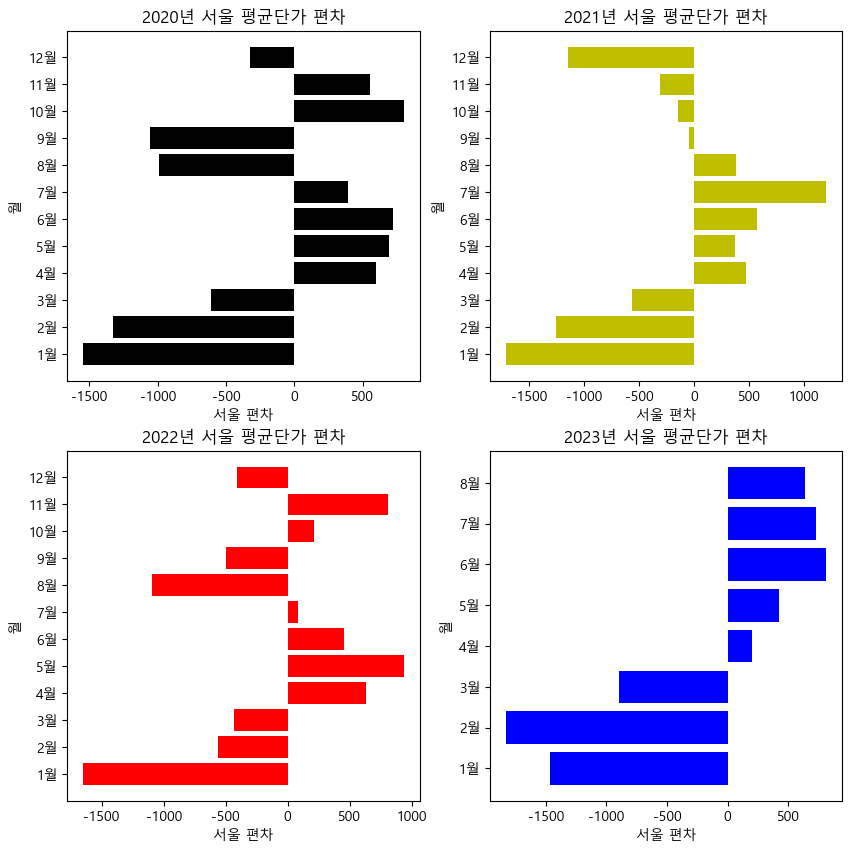

In [ ]:
months = mean_all['Date'].dt.month.unique()
pltdata(months, mean_all, "서울")

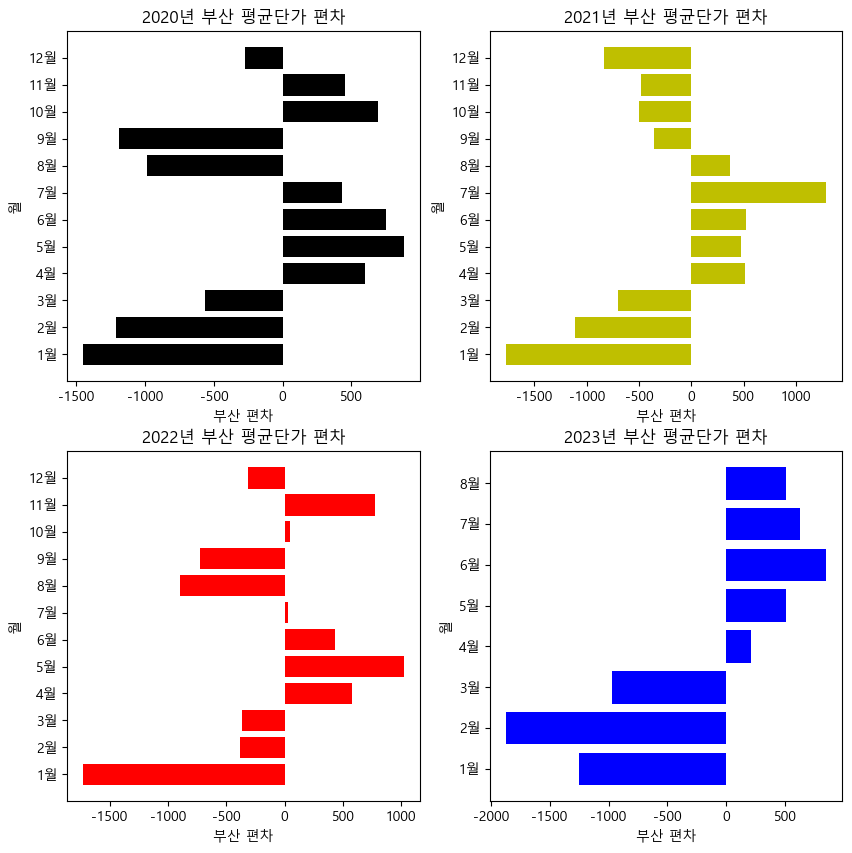

In [ ]:
pltdata(months, mean_all, "부산")

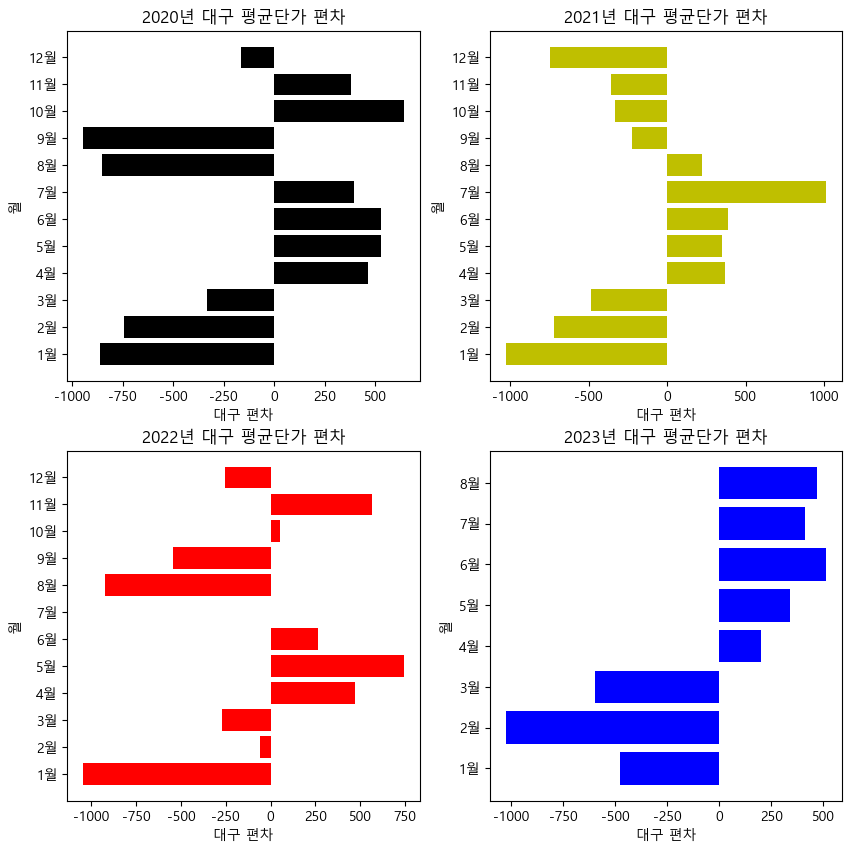

In [ ]:
pltdata(months, mean_all, "대구")

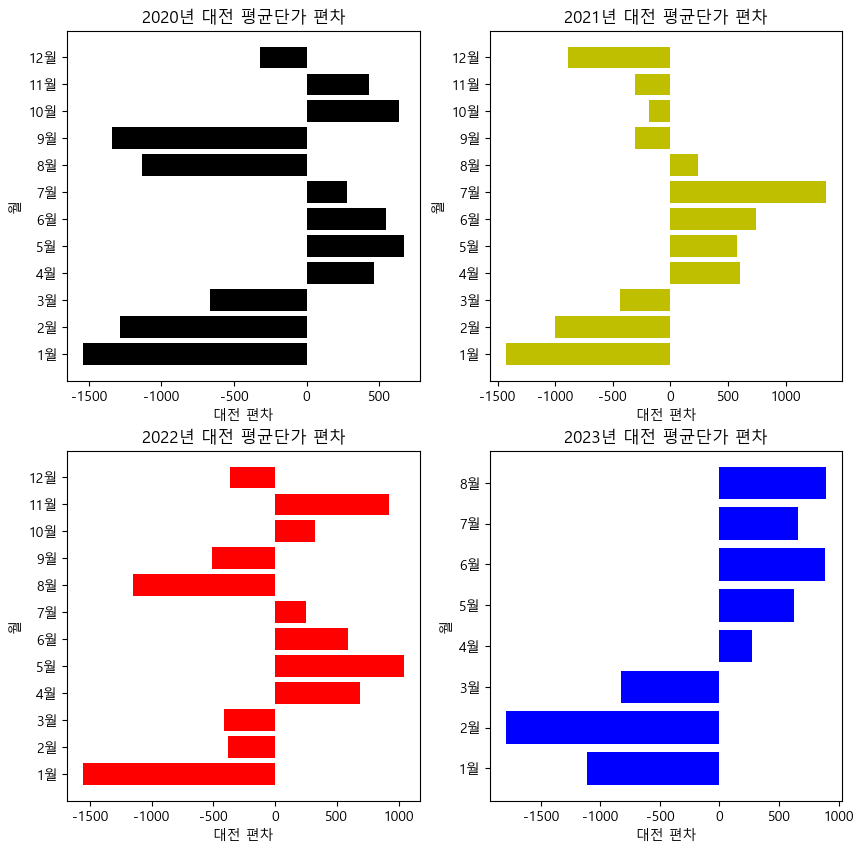

In [ ]:
pltdata(months, mean_all, "대전")

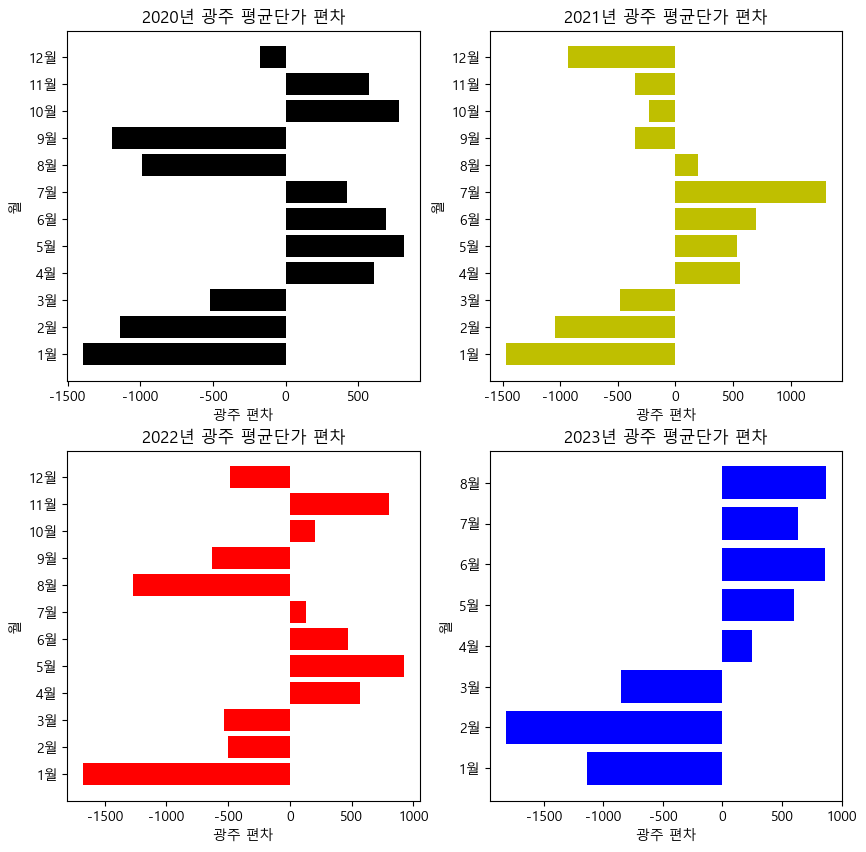

In [ ]:
pltdata(months, mean_all, "광주")

In [ ]:
get_data['전국 평균단가'] = (get_data['서울 총거래금액'] + get_data['부산 총거래금액'] + get_data['대구 총거래금액'] + get_data['대전 총거래금액'] + get_data['광주 총거래금액']) / (get_data['서울 총거래물량'] + get_data['부산 총거래물량'] + get_data['대구 총거래물량'] + get_data['대전 총거래물량'] + get_data['광주 총거래물량']) 

In [ ]:
get_data.head()

,Date,서울 총거래물량,서울 총거래금액,서울 평균단가,부산 총거래물량,부산 총거래금액,부산 평균단가,대구 총거래물량,대구 총거래금액,대구 평균단가,대전 총거래물량,대전 총거래금액,대전 평균단가,광주 총거래물량,광주 총거래금액,광주 평균단가,전국 평균단가
0,2020-01-01,2780377.65,9830108400,3535.529931,314022.5,1158346710,3688.737941,810553.0,2032616500,2507.691045,430426.0,1337955110,3108.443983,478129.0,1644281360,3438.991067,3324.666248
1,2020-02-01,2720669.88,9024401700,3316.977839,331341.0,1143201466,3450.226401,827334.0,1977870900,2390.655890,406261.0,1228049490,3022.809204,451781.0,1441064160,3189.740516,3127.164424
2,2020-03-01,3739541.28,9722242800,2599.849038,435282.4,1220358529,2803.601820,978456.0,1935109400,1977.717342,520843.0,1246237300,2392.731207,587348.0,1509172300,2569.468697,2496.717006
3,2020-04-01,5703989.95,7969557560,1397.189972,607195.5,995696080,1639.827831,1427859.0,1686934100,1181.443056,615618.0,884077957,1436.082046,800667.0,1154068030,1441.383284,1386.114372
4,2020-05-01,5487463.43,7107073600,1295.147328,644394.2,875168986,1358.126727,1371680.0,1533032100,1117.631007,631163.0,818889984,1297.430274,759615.0,938017136,1234.858627,1267.346727


In [ ]:
years = get_data['Date'].dt.year.unique()
months = get_data['Date'].dt.month.unique()
all_grade_data = []
for i in years:
    for j in months:
        if ( i != 2023 ) or ( j not in [9, 10, 11, 12]):
            g_date = str(i)+"-"+str(j)
            total_data = year_df.loc[year_df['year']==i, '전국 평균단가'].values
            total_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '전국 평균단가'].values
            total_grade = total_data - total_data1

            all_grade_data.append([g_date,total_grade[0]])
print(all_grade_data)

[['2020-1', -1372.6737629937743], ['2020-2', -1175.171939607037], ['2020-3', -544.7245211032609], ['2020-4', 565.8781132858705], ['2020-5', 684.64575746071], ['2020-6', 693.3455775554819], ['2020-7', 409.4970073228094], ['2020-8', -950.600299396312], ['2020-9', -1036.5615568230924], ['2020-10', 765.6285753700913], ['2020-11', 511.0563856349779], ['2020-12', -272.5275730058379], ['2021-1', -1533.9131244154933], ['2021-2', -1094.5544814068453], ['2021-3', -548.2440373511299], ['2021-4', 468.24703055487976], ['2021-5', 396.7025621060691], ['2021-6', 554.8992293816395], ['2021-7', 1191.6749709683481], ['2021-8', 340.2475366069766], ['2021-9', -124.55052490598109], ['2021-10', -210.41202448836248], ['2021-11', -335.4279853787257], ['2021-12', -1005.8754079414216], ['2022-1', -1533.6236008737433], ['2022-2', -420.37497500251766], ['2022-3', -389.8466866325148], ['2022-4', 589.5557399828576], ['2022-5', 913.4551753061387], ['2022-6', 416.9073641720115], ['2022-7', 64.03933356797643], ['2022-8

In [ ]:
total_df = pd.DataFrame(all_grade_data, columns=['Date', '전국 평균단가 편차'])

In [ ]:
total_df['Date'] = pd.to_datetime(total_df['Date'])

In [ ]:
total_all = pd.merge(get_data, total_df, on='Date', how='inner')

In [ ]:
total_all.head()

,Date,서울 총거래물량,서울 총거래금액,서울 평균단가,부산 총거래물량,부산 총거래금액,부산 평균단가,대구 총거래물량,대구 총거래금액,대구 평균단가,대전 총거래물량,대전 총거래금액,대전 평균단가,광주 총거래물량,광주 총거래금액,광주 평균단가,전국 평균단가,전국 평균단가 편차
0,2020-01-01,2780377.65,9830108400,3535.529931,314022.5,1158346710,3688.737941,810553.0,2032616500,2507.691045,430426.0,1337955110,3108.443983,478129.0,1644281360,3438.991067,3324.666248,-1372.673763
1,2020-02-01,2720669.88,9024401700,3316.977839,331341.0,1143201466,3450.226401,827334.0,1977870900,2390.655890,406261.0,1228049490,3022.809204,451781.0,1441064160,3189.740516,3127.164424,-1175.171940
2,2020-03-01,3739541.28,9722242800,2599.849038,435282.4,1220358529,2803.601820,978456.0,1935109400,1977.717342,520843.0,1246237300,2392.731207,587348.0,1509172300,2569.468697,2496.717006,-544.724521
3,2020-04-01,5703989.95,7969557560,1397.189972,607195.5,995696080,1639.827831,1427859.0,1686934100,1181.443056,615618.0,884077957,1436.082046,800667.0,1154068030,1441.383284,1386.114372,565.878113
4,2020-05-01,5487463.43,7107073600,1295.147328,644394.2,875168986,1358.126727,1371680.0,1533032100,1117.631007,631163.0,818889984,1297.430274,759615.0,938017136,1234.858627,1267.346727,684.645757


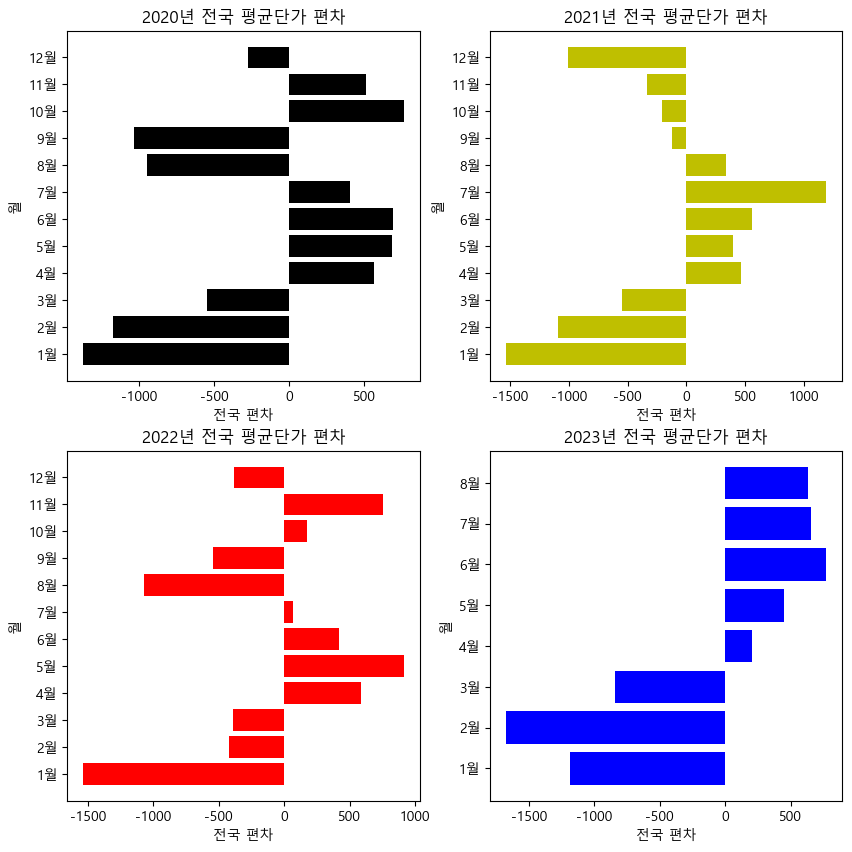

In [ ]:
pltdata(months, total_all, "전국")

In [ ]:
months[:9]

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [ ]:

def areadata(month, data, crop, area1, area2):
    plt.figure(figsize=(10,10))
    data['Date'] = pd.to_datetime(data['Date'])
    plt.subplot(2,2,1)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area1], height=0.4, label=area1)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area2], height=0.4, label=area2)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2020년 지역별 %s 평균단가 편차' % crop)
    plt.legend()
    
    plt.subplot(2,2,2)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area1], height=0.4, label=area1)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area2], height=0.4, label=area2)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2021년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.subplot(2,2,3)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area1], height=0.4, label=area1)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area2], height=0.4, label=area2)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2022년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.subplot(2,2,4)
    plt.barh(month[:8]+0.2, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차' % area1], height=0.4, label=area1)
    plt.barh(month[:8]-0.2, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area2], height=0.4, label=area2)
    plt.ylabel('월')
    plt.yticks(month[:8], [f'{i}월' for i in month[:8]])
    plt.xlabel('%s 편차' %crop)
    plt.title('2023년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.savefig('../data/각 년도 별 두 지역의 %s 평균 단가 편차.png' % crop)
    plt.show()

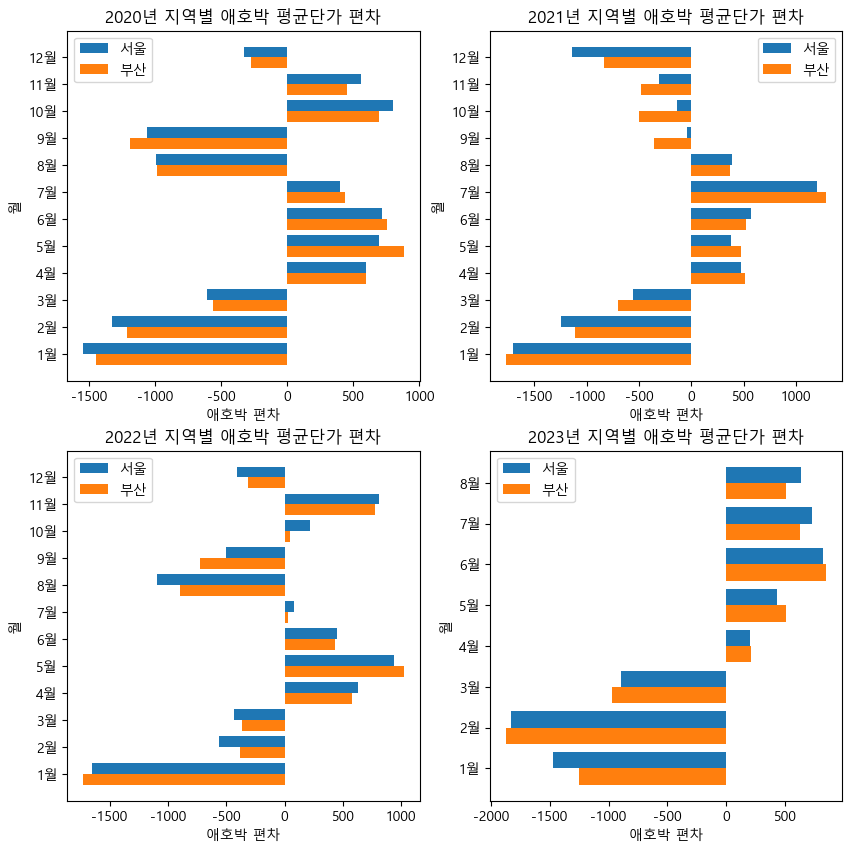

In [ ]:
areadata(months, mean_all, "애호박", "서울", "부산")

In [ ]:

def multiareadata(month, data, crop, area1, area2, area3, area4, area5):
    plt.figure(figsize=(10,10))
    data['Date'] = pd.to_datetime(data['Date'])
    plt.subplot(2,2,1)
    plt.barh(month+0.4, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area1], height=0.2, label=area1)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area2], height=0.2, label=area2)
    plt.barh(month, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area3], height=0.2, label=area3)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area4], height=0.2, label=area4)
    plt.barh(month-0.4, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area5], height=0.2, label=area5)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2020년 지역별 %s 평균단가 편차' % crop)
    plt.legend()
    
    plt.subplot(2,2,2)
    plt.barh(month+0.4, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area1], height=0.2, label=area1)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area2], height=0.2, label=area2)
    plt.barh(month, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area3], height=0.2, label=area3)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area4], height=0.2, label=area4)
    plt.barh(month-0.4, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area5], height=0.2, label=area5)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2021년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.subplot(2,2,3)
    plt.barh(month+0.4, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area1], height=0.2, label=area1)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area2], height=0.2, label=area2)
    plt.barh(month, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area3], height=0.2, label=area3)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area4], height=0.2, label=area4)
    plt.barh(month-0.4, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area5], height=0.2, label=area5)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2022년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.subplot(2,2,4)
    plt.barh(month[:8]+0.4, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area1], height=0.2, label=area1)
    plt.barh(month[:8]+0.2, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area2], height=0.2, label=area2)
    plt.barh(month[:8], data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area3], height=0.2, label=area3)
    plt.barh(month[:8]-0.2, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area4], height=0.2, label=area4)
    plt.barh(month[:8]-0.4, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area5], height=0.2, label=area5)
    plt.ylabel('월')
    plt.yticks(month[:8], [f'{i}월' for i in month[:8]])
    plt.xlabel('%s 편차' %crop)
    plt.title('2023년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.savefig('../data/각 년도 별 지역별 %s 평균 단가 편차.png' % crop)
    plt.show()

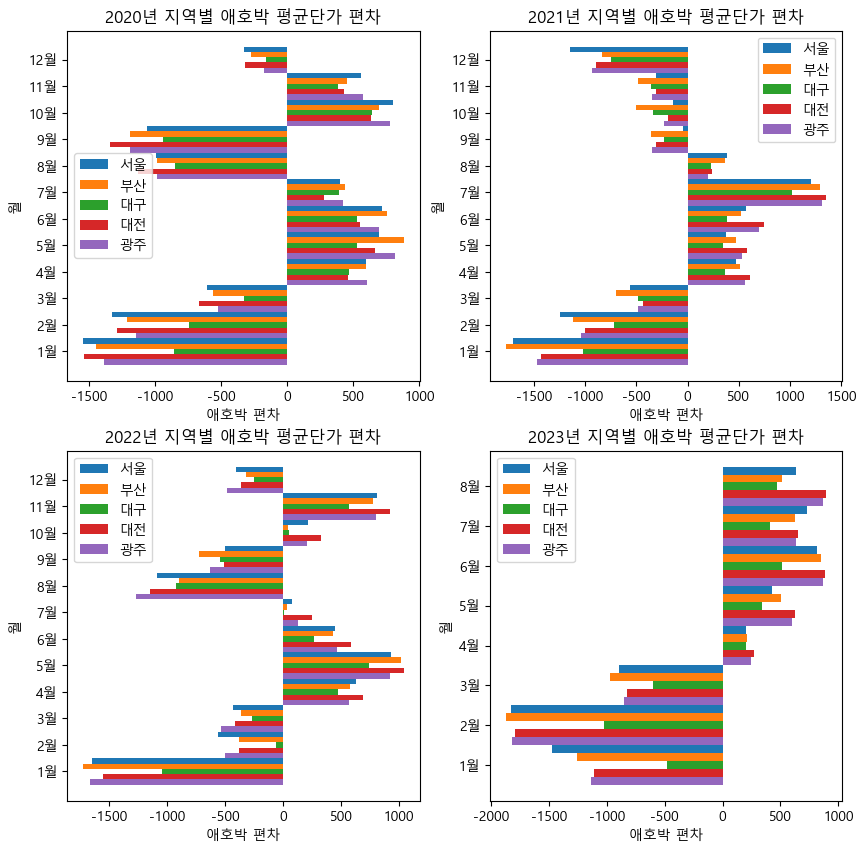

In [ ]:
multiareadata(months, mean_all, "애호박", "서울", "부산", "대구", "대전", "광주")